In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the dataset
df=pd.read_csv("car_evaluation.csv",header=None)

In [4]:
#read the data
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.tail()

,0,1,2,3,4,5,6
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [6]:
col_names=['buying','maint','doors','person','lug_boot','safety','class']
df.columns=col_names
col_names

['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'class']

In [7]:
df.head()

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.tail()

,buying,maint,doors,person,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [9]:
#chaecking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   person    1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
#checking rows and collumns
df.shape

(1728, 7)

In [11]:
#checking missing values
df.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
# checking the count of categorical variables
col_names=['buying','maint','doors','person','lug_boot','safety','class']
for i in col_names:
    print(df[i].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
person
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [13]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [14]:
X=df.drop(['class'],axis=1)
y=df['class']

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [17]:
X_train.shape

(1157, 6)

In [18]:
X_test.shape

(571, 6)

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, 48 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1157 non-null   object
 1   maint     1157 non-null   object
 2   doors     1157 non-null   object
 3   person    1157 non-null   object
 4   lug_boot  1157 non-null   object
 5   safety    1157 non-null   object
dtypes: object(6)
memory usage: 63.3+ KB


In [20]:
X_train.head()

,buying,maint,doors,person,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [21]:
X_train.tail()

,buying,maint,doors,person,lug_boot,safety
1130,med,med,3,more,med,high
1294,med,low,5more,more,big,med
860,high,low,5more,more,med,high
1459,low,high,4,2,small,med
1126,med,med,3,more,small,med


In [22]:
!pip install category_encoders

In [23]:
import category_encoders as ce

In [24]:
encoder = ce.OrdinalEncoder(cols= X_train.columns)

In [25]:
X_train = encoder.fit_transform(X_train)

In [26]:
X_test = encoder.transform(X_test)

In [27]:
X_train.head()

,buying,maint,doors,person,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [28]:
X_test.head()

,buying,maint,doors,person,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

In [31]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [32]:
y_pred_gini=clf_gini.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print ('Model accuracy score with criterion gini index:{0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index:0.8021


In [35]:
y_pred=clf_gini.predict(X_train)

In [36]:
y_pred


array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [37]:
print('Training-set accuracy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred)))

Training-set accuracy score:0.7865


In [38]:
print('Training set score:{:.4f}'.format(clf_gini.score(X_train,y_train)))

Training set score:0.7865


In [39]:
print('Test set score:{:.4f}'.format(clf_gini.score(X_test,y_test)))

Test set score:0.8021


[Text(0.4, 0.875, 'x[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255.0, 49.0, 181.0, 40.0]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

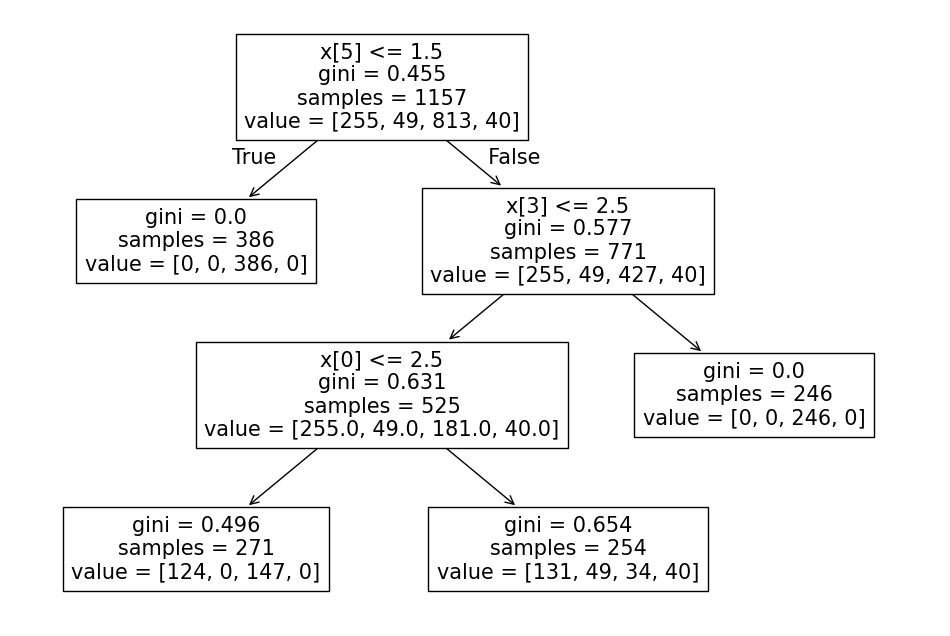

In [40]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train,y_train))

In [41]:
!pip install graphviz

In [42]:
import graphviz

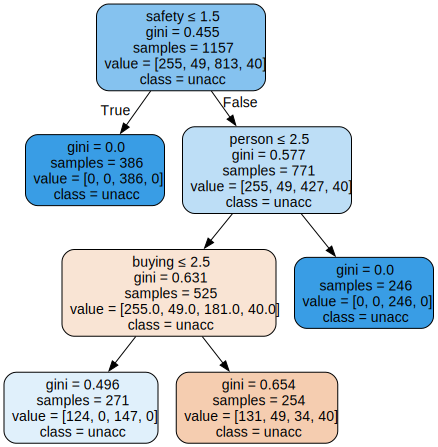

In [43]:
dot_data=tree.export_graphviz(clf_gini,out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True,rounded=True,
                              special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [44]:
clf_en=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

In [45]:
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [46]:
y_pred_en=clf_en.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
print('Model accuracy score with cirtertion entropy:{0:.04f}'.format(accuracy_score(y_test,y_pred_en)))

Model accuracy score with cirtertion entropy:0.8021


In [50]:
y_pred_train_en=clf_en.predict(X_train)

In [51]:
y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [52]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train,y_train)))

Training set score: 0.7865


In [54]:
print('Test set score:{:.4f}'.format(clf_en.score(X_test,y_test)))

Test set score:0.8021


[Text(0.4, 0.875, 'x[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255.0, 49.0, 181.0, 40.0]'),
 Text(0.2, 0.125, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

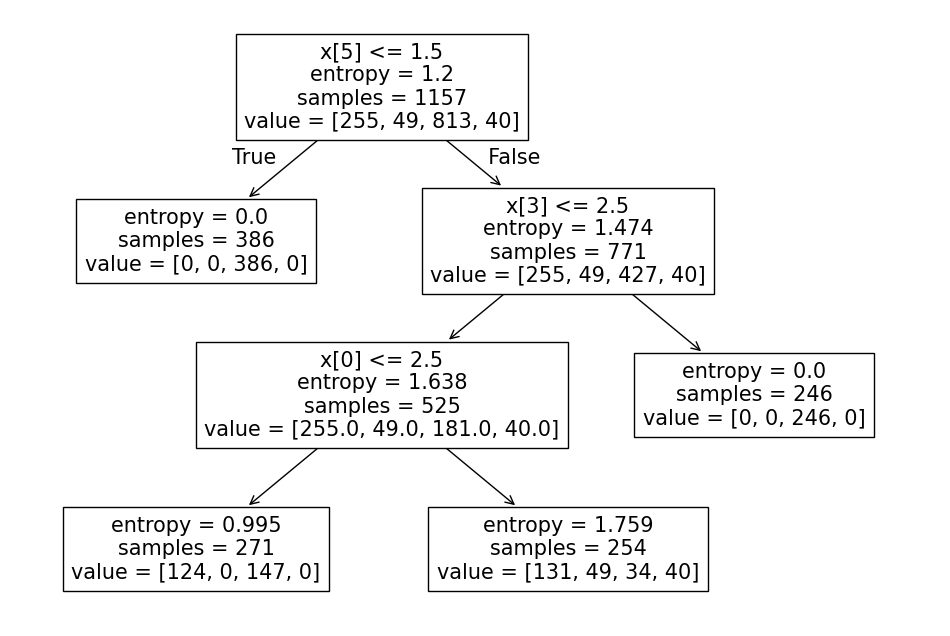

In [55]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train,y_train))

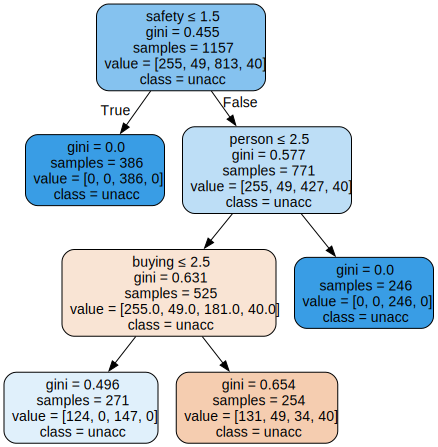

In [57]:
dot_dat=tree.export_graphviz(clf_en,out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True,rounded=True,
                              special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cm=confusion_matrix(y_test,y_pred_en)

In [61]:
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571

